# Splitting by Price 

With the distribution of price being heavily skewed, we decided to split our data into two categories, one with high prices and one for lower prices

## Import Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# load dataset
train_df = pd.read_csv("../Sberbank/train.csv", parse_dates=['timestamp'], index_col=False, low_memory=False)
test_df = pd.read_csv("../Sberbank/test.csv", parse_dates=['timestamp'], index_col=False, low_memory=False)
macro_df = pd.read_csv("../Sberbank/macro.csv", parse_dates=['timestamp'], index_col=False, low_memory=False)

### Merge Train & Test

In [ ]:
frames = [train_df, test_df]

df = pd.concat(frames)

### Add Macro

In [ ]:
# add macro data to train/test data

train_df = pd.merge(train_df, macro_df, how='left', on='timestamp')
test_df = pd.merge(test_df, macro_df, how='left', on='timestamp')

df = pd.merge(df, macro_df, how='left', on='timestamp')

df = df.set_index('timestamp')

## Observing Price Distribution

In [ ]:
%colors?

In [ ]:
sns.hist(df['price_doc'])

In [ ]:
fig = plt.figure(figsize=(14,8),dpi=300)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
fig.text(0.5, 0.04, 'Date', ha='center', va='center', size=15)
fig.text(0.01, 0.5, 'Price of Unit', ha='center', va='center', rotation='vertical', size=15)
ax1.plot(df['price_doc'].rolling(window=150).mean(), lw=.6, color='#3AB2AD')
ax2.plot(df['price_doc'].rolling(window=450).mean(), lw=1, color='#3AB2AD')
ax3.plot(df['price_doc'].rolling(window=1600).mean(), lw=1.4, color='#3AB2AD')
fig.show()
fig.savefig('./img/fig1.png',transparent=True)

In [ ]:
sns.kdeplot(df['price_doc'].notnull())

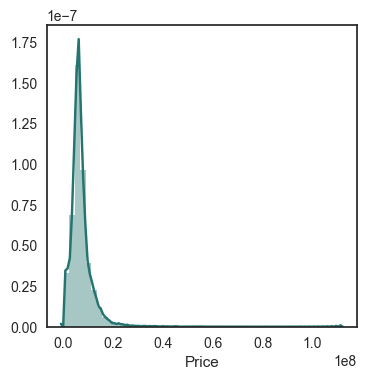

In [338]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
plt.figure(figsize=(4, 4),dpi=100)
d = df.loc[df['price_doc'].notnull(),'price_doc']
sns.distplot(d, kde=True, color="#24746fff", bins=50,axlabel='Price',norm_hist=True)
plt.show()

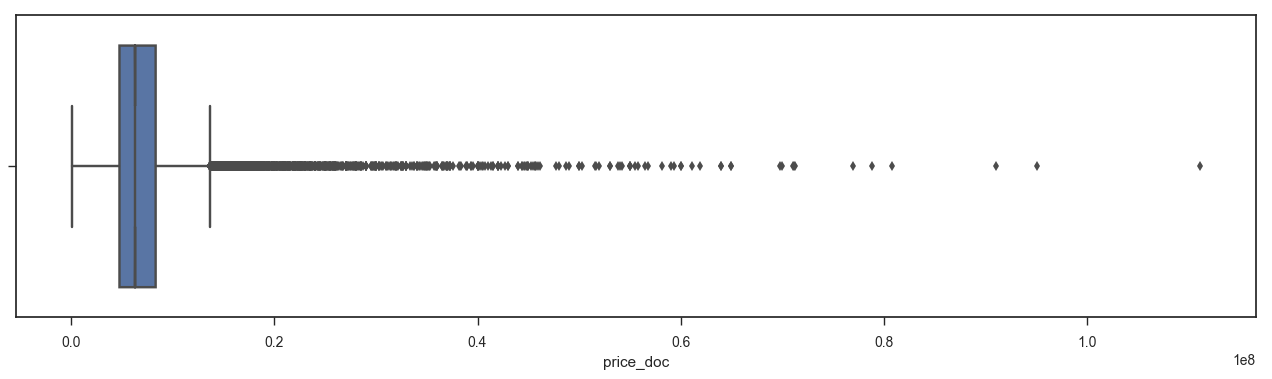

In [288]:
import seaborn as sns

plt.figure(figsize=(16,4),dpi=100)

sns.boxplot(df['price_doc'],notch=True)

### Plotting the different split segments and their respective Normality scores

Normality score is caculated by s^2 + k^2, where s is the z-score by `skewtest` and ``k`` is the z-score by `kurtosistest`.

In [243]:
# caculated by s^2 + k^2, where s is the z-score by skewtest and k 
# is the z-score by kurtosistest.

from scipy.stats.mstats import normaltest
from matplotlib import pyplot as plt

def normality_split(feature, input_range, silent=0):
    splits = {}
    lower_plot = []
    upper_plot = []
    
    sorted_values = np.sort(feature)
        
    for i in input_range:
        lower_array = round(normaltest(sorted_values[int(len(sorted_values)*(i*.01)):])[0], 2)
        upper_array = round(normaltest(sorted_values[:int(len(sorted_values)*(i*.01))])[0], 2)
        splits[i] = [lower_array, upper_array]
        lower_plot.append(lower_array)
        upper_plot.append(upper_array)
        if silent == 0: print "{0} split normality score:".format(splits[i])
            

    plt.figure(figsize=(10,4),dpi=120, frameon=True)
    plt.xlabel("% Split", size=14)
    plt.ylabel("Normal Test Score", size=14)
#     plt.plot(lower_plot, label="Lower Split",lw=3)
    plt.plot(upper_plot, label="Upper Split",lw=3)    
    return 'Lowest Combined Test Score: {0}: '.format(min(splits.values()))
    return plt.show()

In [244]:
prices=df.loc[df['price_doc'].notnull(),'price_doc'].get_values()

[29325.5, 195.05] split normality score:
[29358.58, 562.59] split normality score:
[29407.06, 991.41] split normality score:
[29436.06, 196.66] split normality score:
[29347.63, 201.19] split normality score:
[29263.03, nan] split normality score:
[29186.11, nan] split normality score:
[29064.51, nan] split normality score:
[28888.43, 2079.04] split normality score:
[28692.09, 4776.01] split normality score:
[28488.54, nan] split normality score:
[28266.18, nan] split normality score:
[28028.04, nan] split normality score:
[27777.6, nan] split normality score:
[27515.46, nan] split normality score:
[27244.88, 44444.76] split normality score:


/Users/rezarad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Warning: converting a masked element to nan.


[26967.21, 19003.39] split normality score:
[26686.32, 11816.32] split normality score:
[26397.92, 8011.46] split normality score:
[26103.04, 5821.29] split normality score:
[25801.28, 4443.4] split normality score:
[25493.99, 3575.94] split normality score:
[25183.87, 2988.34] split normality score:
[24869.39, 2554.15] split normality score:
[24551.7, 2227.73] split normality score:
[24229.08, 1978.92] split normality score:
[23902.78, 1787.33] split normality score:
[23573.82, 1639.3] split normality score:
[23241.98, 1526.76] split normality score:
[22909.11, 1439.97] split normality score:
[22573.47, 1371.93] split normality score:
[22236.37, 1319.52] split normality score:
[21895.31, 1278.9] split normality score:
[21553.67, 1251.15] split normality score:
[21210.81, 1231.53] split normality score:
[20865.23, 1219.13] split normality score:
[20519.82, 1215.45] split normality score:
[20174.17, 1216.36] split normality score:
[19826.67, 1222.26] split normality score:
[19477.71, 12

'Lowest Combined Test Score: [152.7, 7512.38]: '

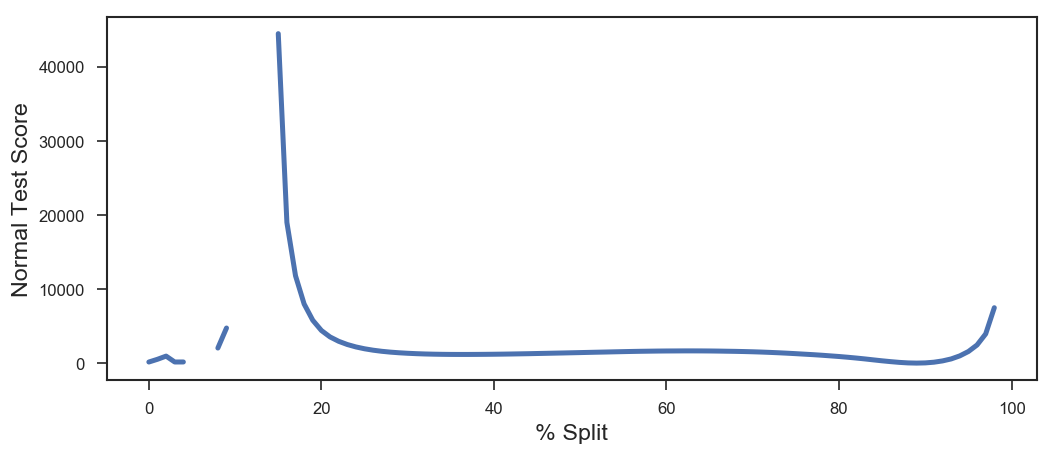

In [245]:
normality_split(prices,range(1,100),silent=0)

It looks like the lowest normality score (which is what we want), is between 90-100. Let's plot again but this time in that range.

In [246]:
feature = df['price_doc']
input_range = np.arange(90,99,1)

normality_split(feature, input_range)

MaskError: Cannot alter the masked element.

95% seems like a good split value

In [247]:
def split_id(df, column, split):
    
    sorted_values = df[column].sort_values().sort_values(ascending=True)
    split_index = int(len(sorted_values)*split)
    split_value = sorted_values[split_index]
    print "Split at Row {0}, Where {1}'s value is less than {2}".format(split_index, column, round(split_value))
    return split_value

In [248]:
split_value = split_id(df=train_df, column='price_doc', split=0.05)

Split at Row 1523, Where price_doc's value is less than 11000000.0


In [249]:
len(train_df['price_doc'].sort_values())

30471

In [250]:
len(train_df)*.2
price_low =  train_df['price_doc'].iloc[:6094:]
price_low.iloc[-1]

5900000

In [251]:
df_lower = train_df.loc[train_df['price_doc'] < 11000000]
df_upper = train_df.loc[train_df['price_doc'] > 11000000]

In [252]:
df_middle = train_df.loc[(train_df['price_doc'] > 5900000) & (train_df['price_doc'] < 11000000)]

In [253]:
len(df_lower),len(df_upper)

(26701, 3636)

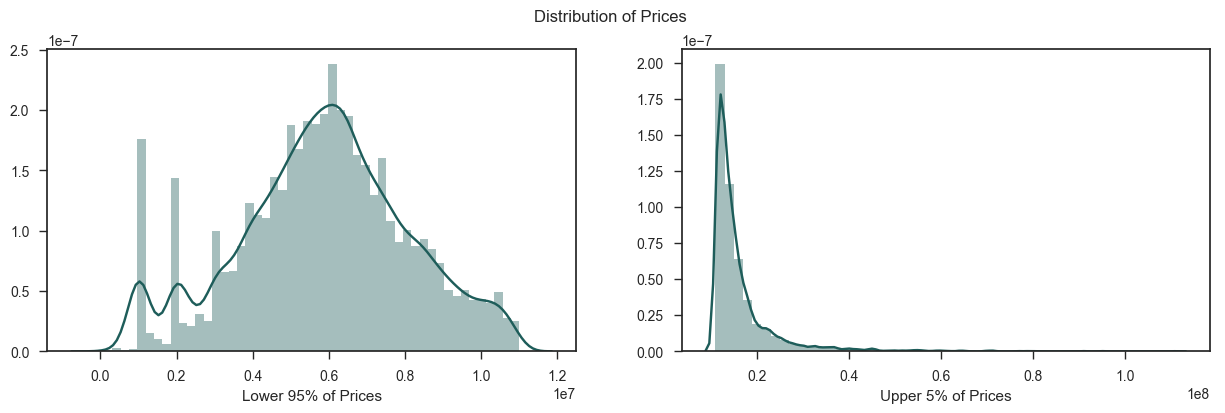

In [263]:
plt.figure(figsize=(15,4),dpi=100)
plt.suptitle('Distribution of Prices')
plt.subplot(121)
sns.distplot(df_lower['price_doc'], color='#1E5D5A')
plt.xlabel('Lower 95% of Prices')
plt.subplot(122)
sns.distplot(df_upper['price_doc'], color='#1E5D5A')
plt.xlabel('Upper 5% of Prices')
plt.show()

Looks good, Now onto testing if this helped with our test results.

### Save to CSV

In [40]:
df_lower.to_csv('./train_price_lower_{0}.csv'.format(datetime.date(datetime.now())), index=False)
df_upper.to_csv('./train_price_upper_{0}.csv'.format(datetime.date(datetime.now())), index=False)